## Exploratory Data Analysis

### Imports

In [1]:
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O
import numpy as np # data structures, mathematical functions
import matplotlib.pyplot as plt # data visulation and ploting
import seaborn as sns # data visulation and ploting

from sklearn.preprocessing import StandardScaler #scale each feature/varibale to unit variance

from save_utils import save_file

### Load The Credit Card Data

In [2]:
credit_data = pd.read_csv('credit_data_cleaned.csv')

In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37097 entries, 0 to 37096
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AcountNumber               37097 non-null  int64  
 1   CVV                        37097 non-null  int64  
 2   CustomerAge                37097 non-null  float64
 3   Gender                     37097 non-null  object 
 4   MaritalStatus              37097 non-null  object 
 5   CardColour                 37097 non-null  object 
 6   CardType                   37097 non-null  object 
 7   Domain                     37097 non-null  object 
 8   Amount                     37097 non-null  int64  
 9   AverageIncomeExpendicture  37097 non-null  int64  
 10  Outcome                    37097 non-null  int64  
 11  Customer_City_Address      37097 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 3.4+ MB


In [4]:
credit_data.head()

,AcountNumber,CVV,CustomerAge,Gender,MaritalStatus,CardColour,CardType,Domain,Amount,AverageIncomeExpendicture,Outcome,Customer_City_Address
0,1275734409,364,28.0,Male,Married,Gold,Verve,Local,129282,170919,0,Enugu
1,1271246193,401,25.0,Male,Single,Gold,Verve,International,574384,329353,1,Enugu
2,1242290165,266,21.0,Female,Married,White,Visa,International,190766,292922,0,Enugu
3,1245478185,402,26.0,Male,Unknown,White,Visa,Local,130395,145444,0,Ibadan
4,1258212072,334,28.0,Female,Married,Gold,Verve,International,685145,295990,1,Port Harcourt


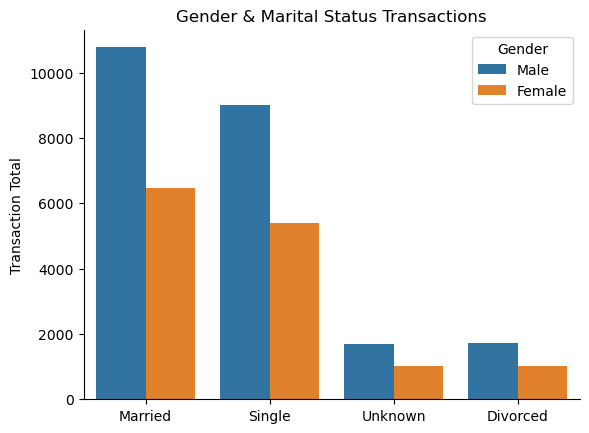

In [5]:
sns.countplot(data=credit_data, x='MaritalStatus', hue="Gender")
plt.xlabel('')
plt.ylabel('Transaction Total')
plt.title('Gender & Marital Status Transactions')
sns.despine()
plt.show()

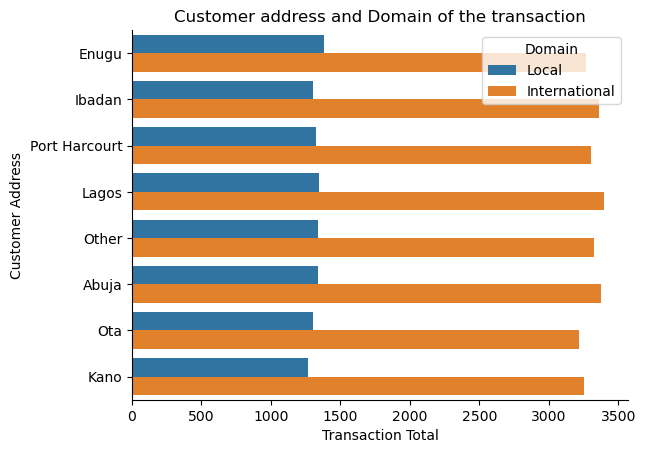

In [6]:
sns.countplot(data=credit_data, y='Customer_City_Address', hue='Domain')
plt.xlabel('Transaction Total')
plt.ylabel('Customer Address')
plt.title('Customer address and Domain of the transaction')
sns.despine()
plt.show()

### Visualizing the relationship between variables

Using a correlation matrix to look at all the relationships between the variables in the credit card data.

/var/folders/m3/xf6gvy7n3qdbcwzd5vjb0b7r0000gn/T/ipykernel_44338/376668487.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = credit_data.corr()


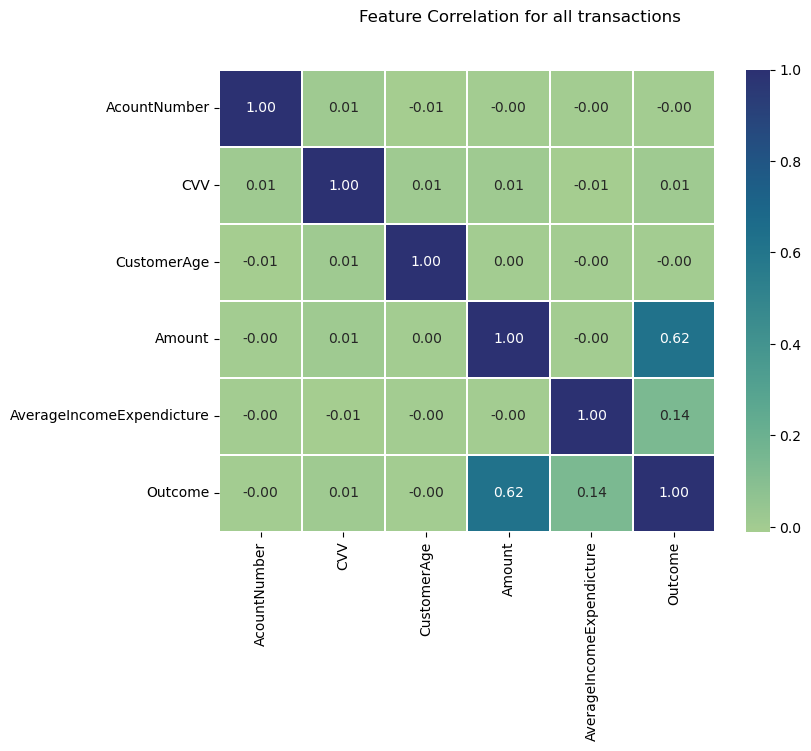

In [7]:
matrix = credit_data.corr()
x, ax = plt.subplots(figsize=(8, 6))
heatmap = sns.heatmap(round(matrix,2), annot=True, ax=ax, cmap="crest",fmt='.2f', linewidths=.02)
x.subplots_adjust()
title = x.suptitle('Feature Correlation for all transactions', fontsize=12)

Notice there is a moderately strong correlation between the amount and outcome variables.

/Users/kendallherron/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


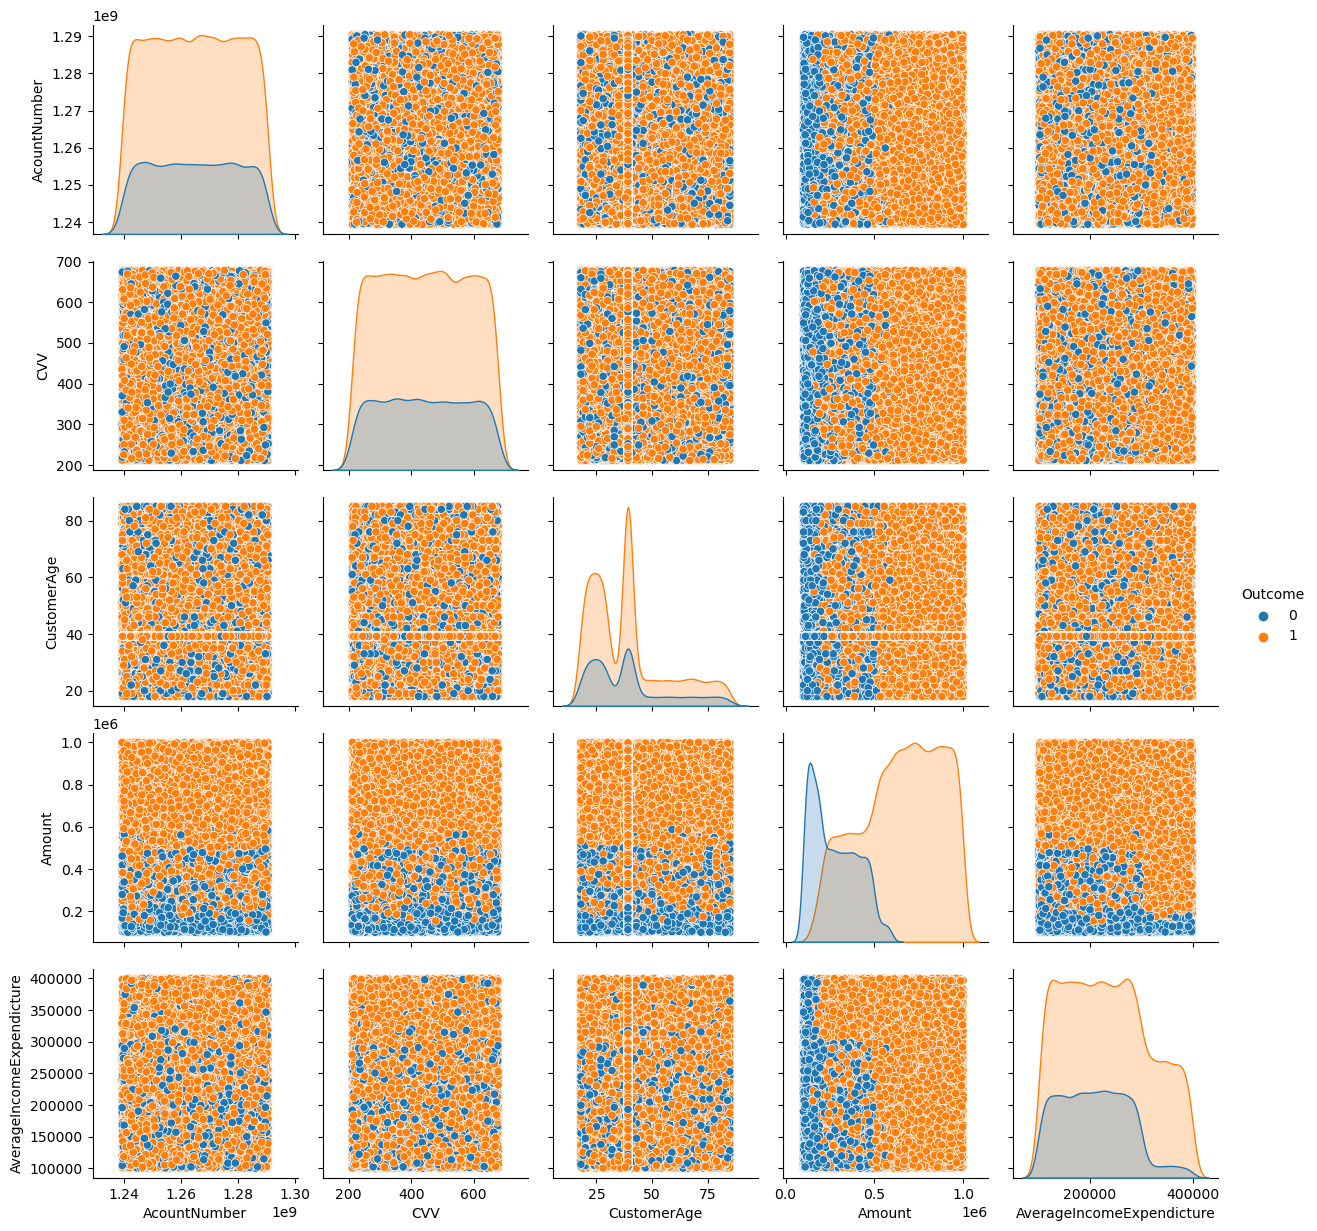

In [8]:
sns.pairplot(credit_data,  hue='Outcome')
plt.show()

In [9]:
min(credit_data.Amount), max(credit_data.Amount)

(100003, 999956)

In [19]:
scaler = StandardScaler()
X = credit_data['Amount'].values.reshape
X = np.array(X).reshape((len(X), 1))
credit_data['Amount'] = scaler.fit_transform(X)

In [20]:
credit_data['Amount'].mean()

2.470820090925221e-17

In [21]:
credit_data['Amount'].std()

1.000013478451328

In [23]:
# save the data to a new csv file to work preprocessing and training
datapath = '../DataScienceCapstone'
save_file(credit_data, 'credit_data_eda.csv', datapath)

Writing file.  "../DataScienceCapstone/credit_data_eda.csv"
